# Week Four: Wrangling Data for Visualisation

> Based on the dataset https://docs.google.com/spreadsheets/d/1iEl565M1mICTubTtoxXMdxzaHzAcPTnb3kpRndsrfyY/edit?ts=5bd7f609#gid=671375968

* tidyverse This package contains both dplyr and ggplot2, so it is very useful

* Piping The sequence %>% is used to pipe commands together

* Projection To select: - data %>% select(vbl1, vbl2,..., vbln)
 
* Selection To select: - 
 * data %>% filter(vbl1 == value)
 * To extract 1 column, use 'pull'
* lubridate - This package allows us to manipulate dates.  From this we will use ymd() 
* Zoo Package - This package gives us methods such as rollmean, that will allow us to look at rolling averages over time. From this we will use rollmean()

In [1]:
install.packages("zoo")
library(tidyverse)
library(lubridate)
library(zoo)


The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//RtmpCqvNRm/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




## Import DataSet

In [123]:
dfsource<-"./data/POTUS_approval.csv"
polls <- read.csv(dfsource, stringsAsFactors = F)
head(polls)

,President,Start.Date,End.Date,Approving,Disapproving,Unsure.NoData
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,Barack Obama,16/01/2017,19/01/2017,59,37,4
2,Barack Obama,09/01/2017,15/01/2017,57,39,4
3,Barack Obama,02/01/2017,08/01/2017,55,42,3
4,Barack Obama,26/12/2016,01/01/2017,55,40,5
5,Barack Obama,19/12/2016,25/12/2016,56,40,4
6,Barack Obama,12/12/2016,18/12/2016,56,40,4


## Format Column Names

In [124]:
polls<-polls %>% 
  rename(
    Date = Start.Date,
    EndDate = End.Date,
    Approve = Approving,
    Disapprove = Disapproving
    )

## Format Dates Properly

In [125]:
polls$Date<-dmy(polls$Date) # Formats the date

str(polls)

'data.frame':	1305 obs. of  6 variables:
 $ President    : chr  "Barack Obama" "Barack Obama" "Barack Obama" "Barack Obama" ...
 $ Date         : Date, format: "2017-01-16" "2017-01-09" ...
 $ EndDate      : chr  "19/01/2017" "15/01/2017" "08/01/2017" "01/01/2017" ...
 $ Approve      : int  59 57 55 55 56 56 57 54 56 56 ...
 $ Disapprove   : int  37 39 42 40 40 40 40 43 40 41 ...
 $ Unsure.NoData: int  4 4 3 5 4 4 3 3 4 3 ...


## Sample Query: 
Let's see what Trump's approval rate was on different dates 

In [126]:
TrumpApprove <- polls %>% 
  select(President, Date, Approve) %>%
  filter (President == "Donald Trump")

In [127]:
glimpse(TrumpApprove)

Rows: 141
Columns: 3
$ President <chr> "Donald Trump", "Donald Trump", "Donald Trump", "Donald Tru…
$ Date      <date> 2021-01-04, 2020-12-01, 2020-11-05, 2020-10-16, 2020-09-30…
$ Approve   <int> 34, 39, 43, 46, 43, 46, 42, 42, 41, 38, 39, 49, 49, 43, 49,…


## Aggregation - GroupBy(), Mean(), Median()

grouping is done using group_by(variable)

Summarising functions include mean(), median()

Display the mean approval percentage for each president over all polls taken during their presidency.

## Drop NA Value Rows

In [128]:
nrow(polls)
polls <- drop_na(polls)
nrow(polls)

[1] 1305

[1] 1305

In [129]:
#To extract  as vector 
Avgpolls <- polls%>% 
    group_by(President) %>%
    summarise(MeanApproval = mean(Approve)) 
Avgpolls

,President,MeanApproval
,<chr>,<dbl>
1,Barack Obama,47.96890
2,Donald Trump,40.38298
3,George Bush,61.41593
4,George W. Bush,51.34752
5,Ronald Reagan,52.23704
6,William J. Clinton,55.49074


## Use pull to select one column

In [130]:
Avgpolls %>% pull(MeanApproval)

[1] 47.96890 40.38298 61.41593 51.34752 52.23704 55.49074

In [131]:
Avgpolls$MeanApproval

[1] 47.96890 40.38298 61.41593 51.34752 52.23704 55.49074

## Getting moving averages

This is an average over a time frame time.  For this, we need the lubridate package

In [132]:
date <-ymd("2021-02-17")

## Isolate Trump Polls (Select Columns, Filter By President, Arrange By Date)

In [133]:
TrumpPolls <-polls %>%
    select(President, Date, Approve, Disapprove) %>%
    filter (President == "Donald Trump") %>%
  arrange(Date) 
head(TrumpPolls)

,President,Date,Approve,Disapprove
,<chr>,<date>,<int>,<int>
1,Donald Trump,2017-01-20,45,47
2,Donald Trump,2017-01-30,43,52
3,Donald Trump,2017-02-06,41,53
4,Donald Trump,2017-02-13,40,54
5,Donald Trump,2017-02-20,42,53
6,Donald Trump,2017-02-27,43,51


## Mutate Dataframe into New Dataframe, Blocking Data into 10 Day Rolling Averages 

In [134]:
TrumpApprove<-TrumpPolls %>%
    mutate(AvgApprove = rollmean(Approve, 10, fill = NA, align="right"))

head(TrumpApprove)
summary(TrumpApprove$Approve)
summary(TrumpApprove$Disapprove)

,President,Date,Approve,Disapprove,AvgApprove
,<chr>,<date>,<int>,<int>,<dbl>
1,Donald Trump,2017-01-20,45,47,NA
2,Donald Trump,2017-01-30,43,52,NA
3,Donald Trump,2017-02-06,41,53,NA
4,Donald Trump,2017-02-13,40,54,NA
5,Donald Trump,2017-02-20,42,53,NA
6,Donald Trump,2017-02-27,43,51,NA


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.00   38.00   40.00   40.38   42.00   49.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.00   53.00   55.00   54.91   57.00   62.00 

Plotting a line chart of Trump's rolling average approval

Warning message:
“Removed 9 row(s) containing missing values (geom_path).”


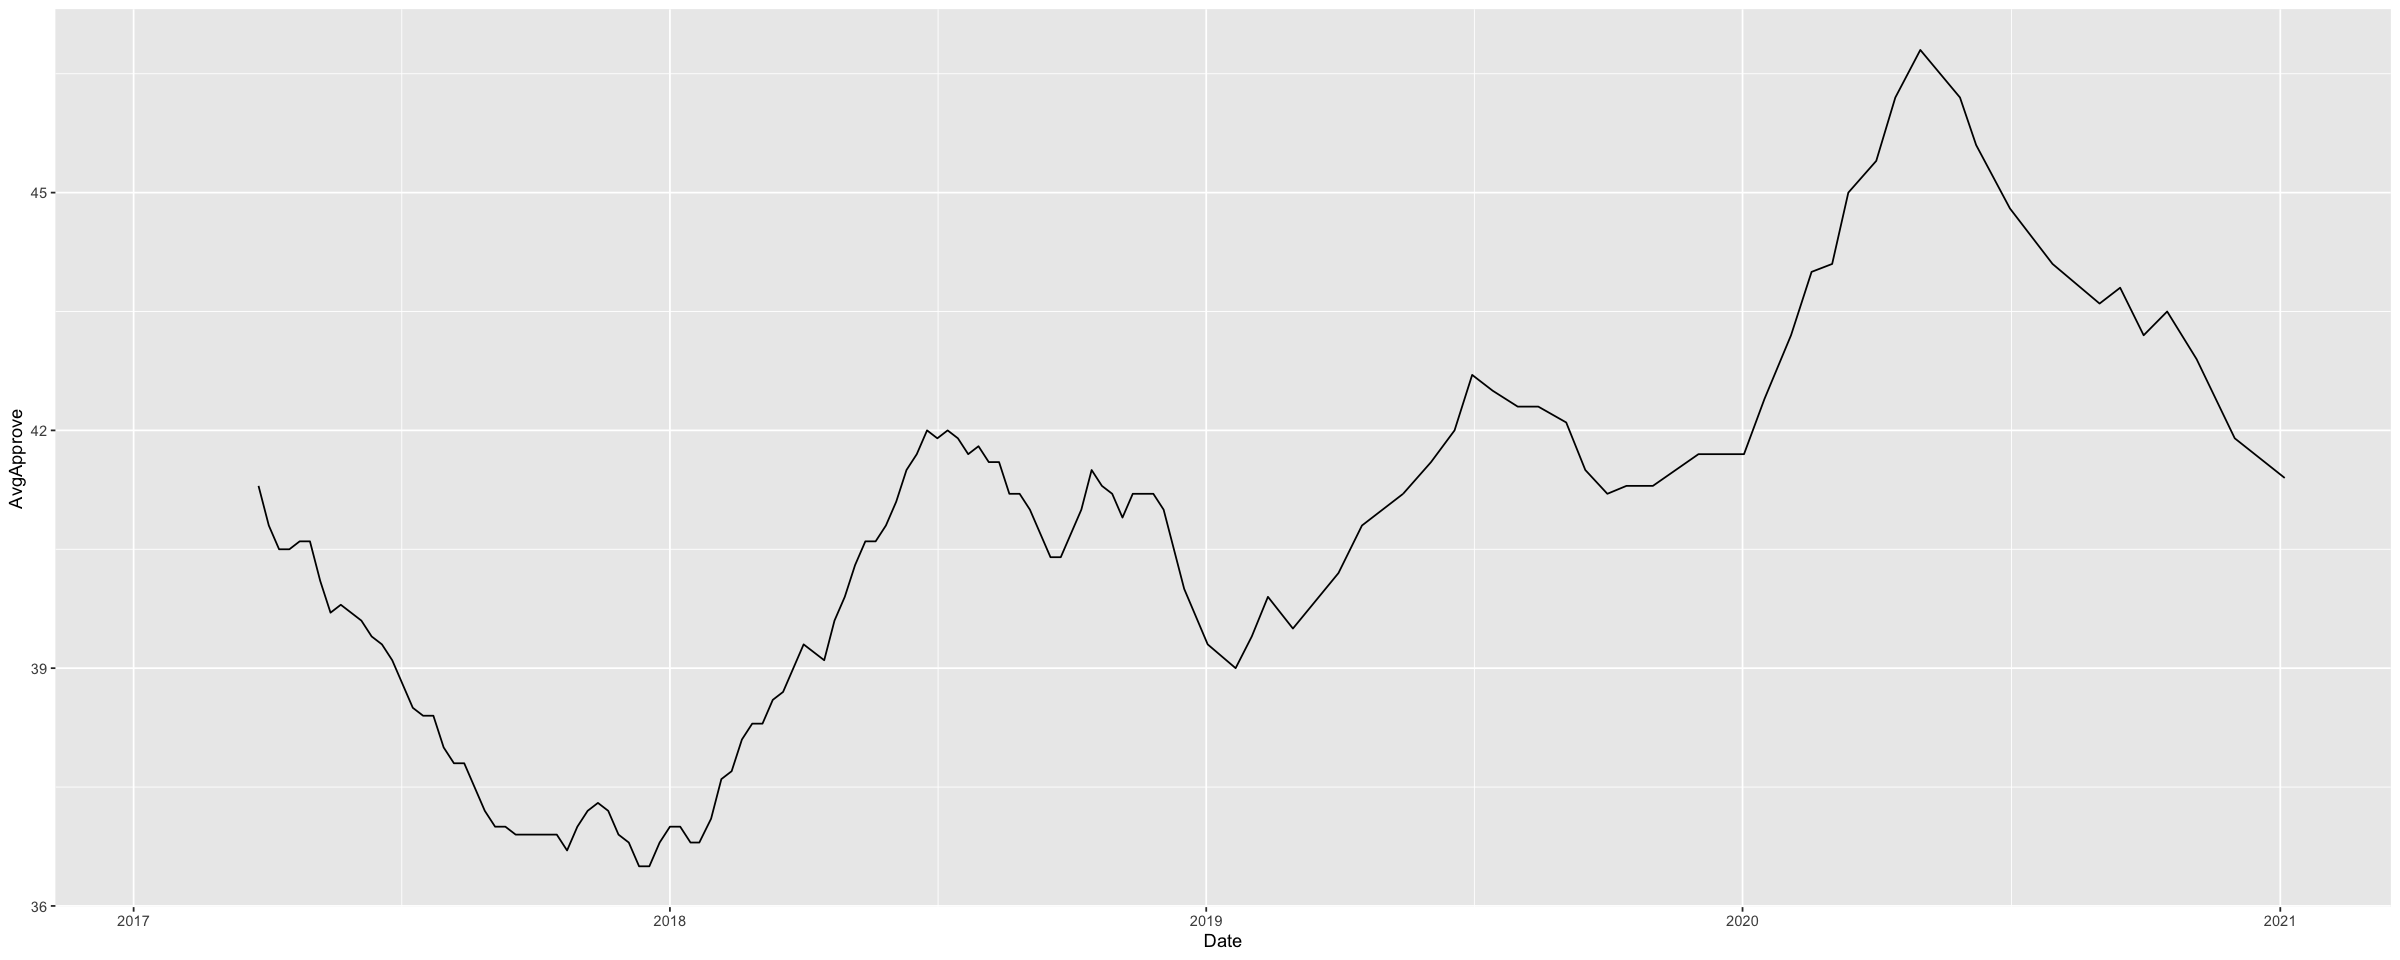

In [135]:
ggplot(data = TrumpApprove, aes(x=Date,y=AvgApprove)) + 
  geom_line()

# For the exercise

  1 - Create a new attribute in the polls dataframe, calling it inaugurated.  Initialize it to 1st Jan 1970 for every row.  Using Google search, find out the first inauguration date of each of the former presidents, back to Ronald Reagan.  Update each row with the inauguration date for that president. ✅

 2 - Create a new attribute Days, giving it a value of Date - inaugurated.  Check to see if the data makes sense.  Do you need to change the data type? ✅
 
 //once the inaugurated date is added you get the days by subtracting the inauguration from the date column

 3 - Using a rolling mean, get the rolling average approval of each president over their presidency and store it as an extra column AvgApprove in the dataframe. ✅
 
  4 - Start plotting your data.  Make a ggplot, create a multi-line plot, with a line for each president.  The x-axis should show the number of days since the start of the presidency and the y-axis should show the rolling approval rating at that time.  You may need to change the size of your plot, so you can see it!  Try the function options(), adjusting the repr.plot.width and  repr.plot.height to your satisfaction.  Save your plot in a variable (e.g. p) ✅
  
   5 - Enhance your plot - suggestions below:
     - Add a title, x-axis label and y-axis label ✅
     - Make your plot readable to colourblind people by creating a palette suitable for them. ✅
     - increase the size of the colour block in your legend ✅
     - Modify the look and style of your title, axis labels and legend labels ✅
     - Modify the ticks on your x-axis, depending on the range of values. ✅
  
  6 - Add a geom_line for one of the presidents, for whom you think their line tells a story, making it thicker than the previous line, but using the same colour. 

---

# Stephen Alger
## Lab Four Work Here....

1 - Create a new attribute in the polls dataframe, calling it inaugurated. Initialize it to 1st Jan 1970 for every row. Using Google search, find out the first inauguration date of each of the former presidents, back to Ronald Reagan. Update each row with the inauguration date for that president.

In [233]:
glimpse(polls)

#Set Environment Plot Size:
options(repr.plot.width=25, repr.plot.height=10)

# Install & Load Colourblind Palette Library ❤️ Viridis!
# Docs: [# Docs: [https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html#the-color-scales]]
install.packages("viridis")
library(viridis)

#Define my Own Theme                           
my_Theme <- theme(plot.title = element_text(face="bold",size=20),
                  plot.subtitle = element_text(face="italic", size = 16),
                  axis.title = element_text(face="bold",size=20),
                  axis.text = element_text(size=20),
                  plot.caption = element_text(size = 16),
                  legend.title = element_text(size = 16),
                  legend.text  = element_text(size = 14))



#days = date - inaugurate
# date <-ymd("2009-02-17")
# polls$Date<-dmy(polls$Date) # Formats the date
# str(polls$Date)
# glimpse(TrumpApprove)

Rows: 1,305
Columns: 8
$ President     <chr> "Barack Obama", "Barack Obama", "Barack Obama", "Barack…
$ Date          <date> 2017-01-16, 2017-01-09, 2017-01-02, 2016-12-26, 2016-1…
$ EndDate       <chr> "19/01/2017", "15/01/2017", "08/01/2017", "01/01/2017",…
$ Approve       <int> 59, 57, 55, 55, 56, 56, 57, 54, 56, 56, 57, 53, 54, 55,…
$ Disapprove    <int> 37, 39, 42, 40, 40, 40, 40, 43, 40, 41, 41, 45, 44, 42,…
$ Unsure.NoData <int> 4, 4, 3, 5, 4, 4, 3, 3, 4, 3, 2, 2, 2, 3, 3, 3, 3, 4, 4…
$ Inaugurated   <date> 2009-02-17, 2009-02-17, 2009-02-17, 2009-02-17, 2009-0…
$ Days          <drtn> 2890 days, 2883 days, 2876 days, 2869 days, 2862 days,…

The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//RtmpCqvNRm/downloaded_packages


In [234]:
#Initialise Date to 1st Jan 1970
polls$Inaugurated <- ymd("1970-01-01")
head(polls$Inaugurated)

[1] "1970-01-01" "1970-01-01" "1970-01-01" "1970-01-01" "1970-01-01"
[6] "1970-01-01"

In [235]:
#List Our Presidents
distinctPresidents <- polls %>% distinct(President) %>% select(President)
head(distinctPresidents)

,President
,<chr>
1,Barack Obama
2,Ronald Reagan
3,George Bush
4,William J. Clinton
5,George W. Bush
6,Donald Trump


In [372]:
#Donald Trump
polls$Inaugurated[polls$President == "Donald Trump"] <- ymd("2017-01-20")

#Barrack Obama
polls$Inaugurated[polls$President == "Barack Obama"] <- ymd("2009-01-20")
                                                         
#George W. Bush
polls$Inaugurated[polls$President == "George W. Bush"] <- ymd("2001-01-20")
                                                           
#William J. Clinton
polls$Inaugurated[polls$President == "William J. Clinton"] <- ymd("1993-01-20")
                                                               
#George HW Bush
polls$Inaugurated[polls$President == "George Bush"] <- ymd("1989-01-20")
                                                               
#Ronald Reagan
polls$Inaugurated[polls$President == "Ronald Reagan"] <- ymd("1981-01-20")

# Assess Outputs
head(polls$Inaugurated)

[1] "2009-01-20" "2009-01-20" "2009-01-20" "2009-01-20" "2009-01-20"
[6] "2009-01-20"

2 - Create a new attribute Days, giving it a value of Date - inaugurated.  Check to see if the data makes sense.  Do you need to change the data type? 


once the inaugurated date is added you get the days by subtracting the inauguration from the date column
 

In [373]:
polls$Days <- polls$Date - polls$Inaugurated 

 3 - Using a rolling mean, get the rolling average approval of each president over their presidency and store it as an extra column AvgApprove in the dataframe.

## To compute moving averages:
 * sort the data by date. 
 * Then  take the mean of all the previous data within a certain window — say, 10 polls. 
 * Then, do the same for every observation  between starting day x and end day y. 

* The zoo package provides the rollmean() function, which iterates over every row in your data and averages the last x observations of variable y. 

### In this case, the rollmean() function would take an average of the president's approval for every previous x, polls. 
We specify:
* The variable we want, in this case, named Approve. 
* The number of observations to average, 
* whether or not to fill the rows between one and x variables with NA,
* whether or not we should average "up" or "down" the data frame.



## Calculate the Rolling Average of Approval per Every 10 Polls

In [374]:
PresidentialApproval <-polls %>%
    arrange(Date) %>%
    mutate(AvgApprove = rollmean(Approve, 10, fill = NA, align="right"))

tail(PresidentialApproval)


,President,Date,EndDate,Approve,Disapprove,Unsure.NoData,Inaugurated,Days,AvgApprove
,<chr>,<date>,<chr>,<int>,<int>,<int>,<date>,<drtn>,<dbl>
1300,Donald Trump,2020-09-14,28/09/2020,46,52,2,2017-01-20,1333 days,43.8
1301,Donald Trump,2020-09-30,15/10/2020,43,55,2,2017-01-20,1349 days,43.2
1302,Donald Trump,2020-10-16,27/10/2020,46,52,2,2017-01-20,1365 days,43.5
1303,Donald Trump,2020-11-05,19/11/2020,43,55,2,2017-01-20,1385 days,42.9
1304,Donald Trump,2020-12-01,17/12/2020,39,57,4,2017-01-20,1411 days,41.9
1305,Donald Trump,2021-01-04,15/01/2021,34,62,4,2017-01-20,1445 days,41.4


## Observation Poll Data Includes Data outside of Terms 
i.e. Poll data exists before Candidate took Office -> Exclude this!

In [375]:
PresidentialApproval %>% arrange(Days)

President,Date,EndDate,Approve,Disapprove,Unsure.NoData,Inaugurated,Days,AvgApprove
<chr>,<date>,<chr>,<int>,<int>,<int>,<date>,<drtn>,<dbl>
Barack Obama,2009-01-19,25/01/2009,67,13,20,2009-01-20,-1 days,32.5
Donald Trump,2017-01-20,29/01/2017,45,47,8,2017-01-20,0 days,55.0
George Bush,1989-01-24,26/01/1989,51,6,43,1989-01-20,4 days,53.3
William J. Clinton,1993-01-24,26/01/1993,58,20,22,1993-01-20,4 days,43.6
Barack Obama,2009-01-26,01/02/2009,66,18,16,2009-01-20,6 days,36.6
William J. Clinton,1993-01-29,31/01/1993,54,30,16,1993-01-20,9 days,45.1
Ronald Reagan,1981-01-30,02/02/1981,51,13,36,1981-01-20,10 days,NA
Donald Trump,2017-01-30,05/02/2017,43,52,5,2017-01-20,10 days,53.7
George W. Bush,2001-02-01,04/02/2001,57,25,18,2001-01-20,12 days,61.4


## Initial Plot Basis: Presidential Approval As One Merged Lineplot (Not Segregated By President)


In [376]:
SinglelineChart <- PresidentialApproval %>%
    ggplot(aes(x=Date,y=AvgApprove, colour=President)) + 
    geom_line(size=5)+ 
    scale_color_viridis(discrete = TRUE, option="magma")+
    theme_bw()+my_Theme+
    guides(color = guide_legend(override.aes = list(size = 20)))+
    theme_bw()+my_Theme+
    labs(x = " ", y="Approval Rating",
        title="Approval in the Office of Presiden - Over the last ~40 Years",
        subtitle="Below is a Trendline Visualisation of Voter Approval in the various Holders of Presidential Office;\nIllustrating High Points and Low Points in One Digestsible Graph.",
        caption="R Dataset Source: [Presidential Approval Poll Data] © Stephen Alger 2021")
    

In [400]:
MultilineChart <- PresidentialApproval %>%
    ggplot(aes(x=Days,y=AvgApprove, colour=President)) + 
    geom_line(size=2)+
    scale_x_continuous(breaks=seq(0,3000,250))+
    annotate("rect", xmin=0, xmax=5, ymin=30, ymax=85, alpha=0.5, fill="blue")+
    annotate("rect", xmin=(1461-10), xmax=(1461), ymin=30, ymax=85, alpha=0.5, fill="red")+
    annotate("rect", xmin=2917, xmax=2922, ymin=30, ymax=85, alpha=0.5, fill="blue")+
    guides(color = guide_legend(override.aes = list(size = 20)))+
    annotate("text", x = 1461+25, y = 75, size=8, angle=-90, alpha=0.75, label = c("Re-Election Point"))+
    annotate("segment", x = 1700, xend = 1461+20, y = 30, yend = 40, colour = "red", size=3, alpha=0.8, arrow=arrow())+
    annotate("text", x = 1725, y = 30, size=8, alpha=0.75, label = c("Trump & GHW Bush Out"))+
    scale_color_viridis(discrete = TRUE, option="plasma")+
    theme_bw()+my_Theme+
    labs(x = "Timeline of Presidency [Days]", y="Approval Rating",
        title="President Approval Ratings",
        subtitle="The chart below represents the Rolling Average of Poll Data\nover the period of Time in Office of the last six Sitting Presidents",
        caption="R Dataset Source: [Presidential Approval Poll Data] © Stephen Alger 2021")

In [401]:
FacetWrapLineChart <- PresidentialApproval %>%
    ggplot(aes(x=Days,y=AvgApprove, colour=President)) + 
    geom_line(size=3)+
    facet_wrap(~President)+
    guides(color = guide_legend(override.aes = list(size = 20)))+
    scale_color_viridis(discrete = TRUE, option="Inferno")+
    theme_bw()+my_Theme+
    labs(x = "Timeline of Presidency [Days]", y="Approval Rating",
        title="Facet Wrap: Segregated President Approval Ratings",
        subtitle="",
        caption="R Dataset Source: [Presidential Approval Poll Data] © Stephen Alger 2021")

Warning message:
“Removed 9 row(s) containing missing values (geom_path).”
Warning message:
“Removed 9 row(s) containing missing values (geom_path).”


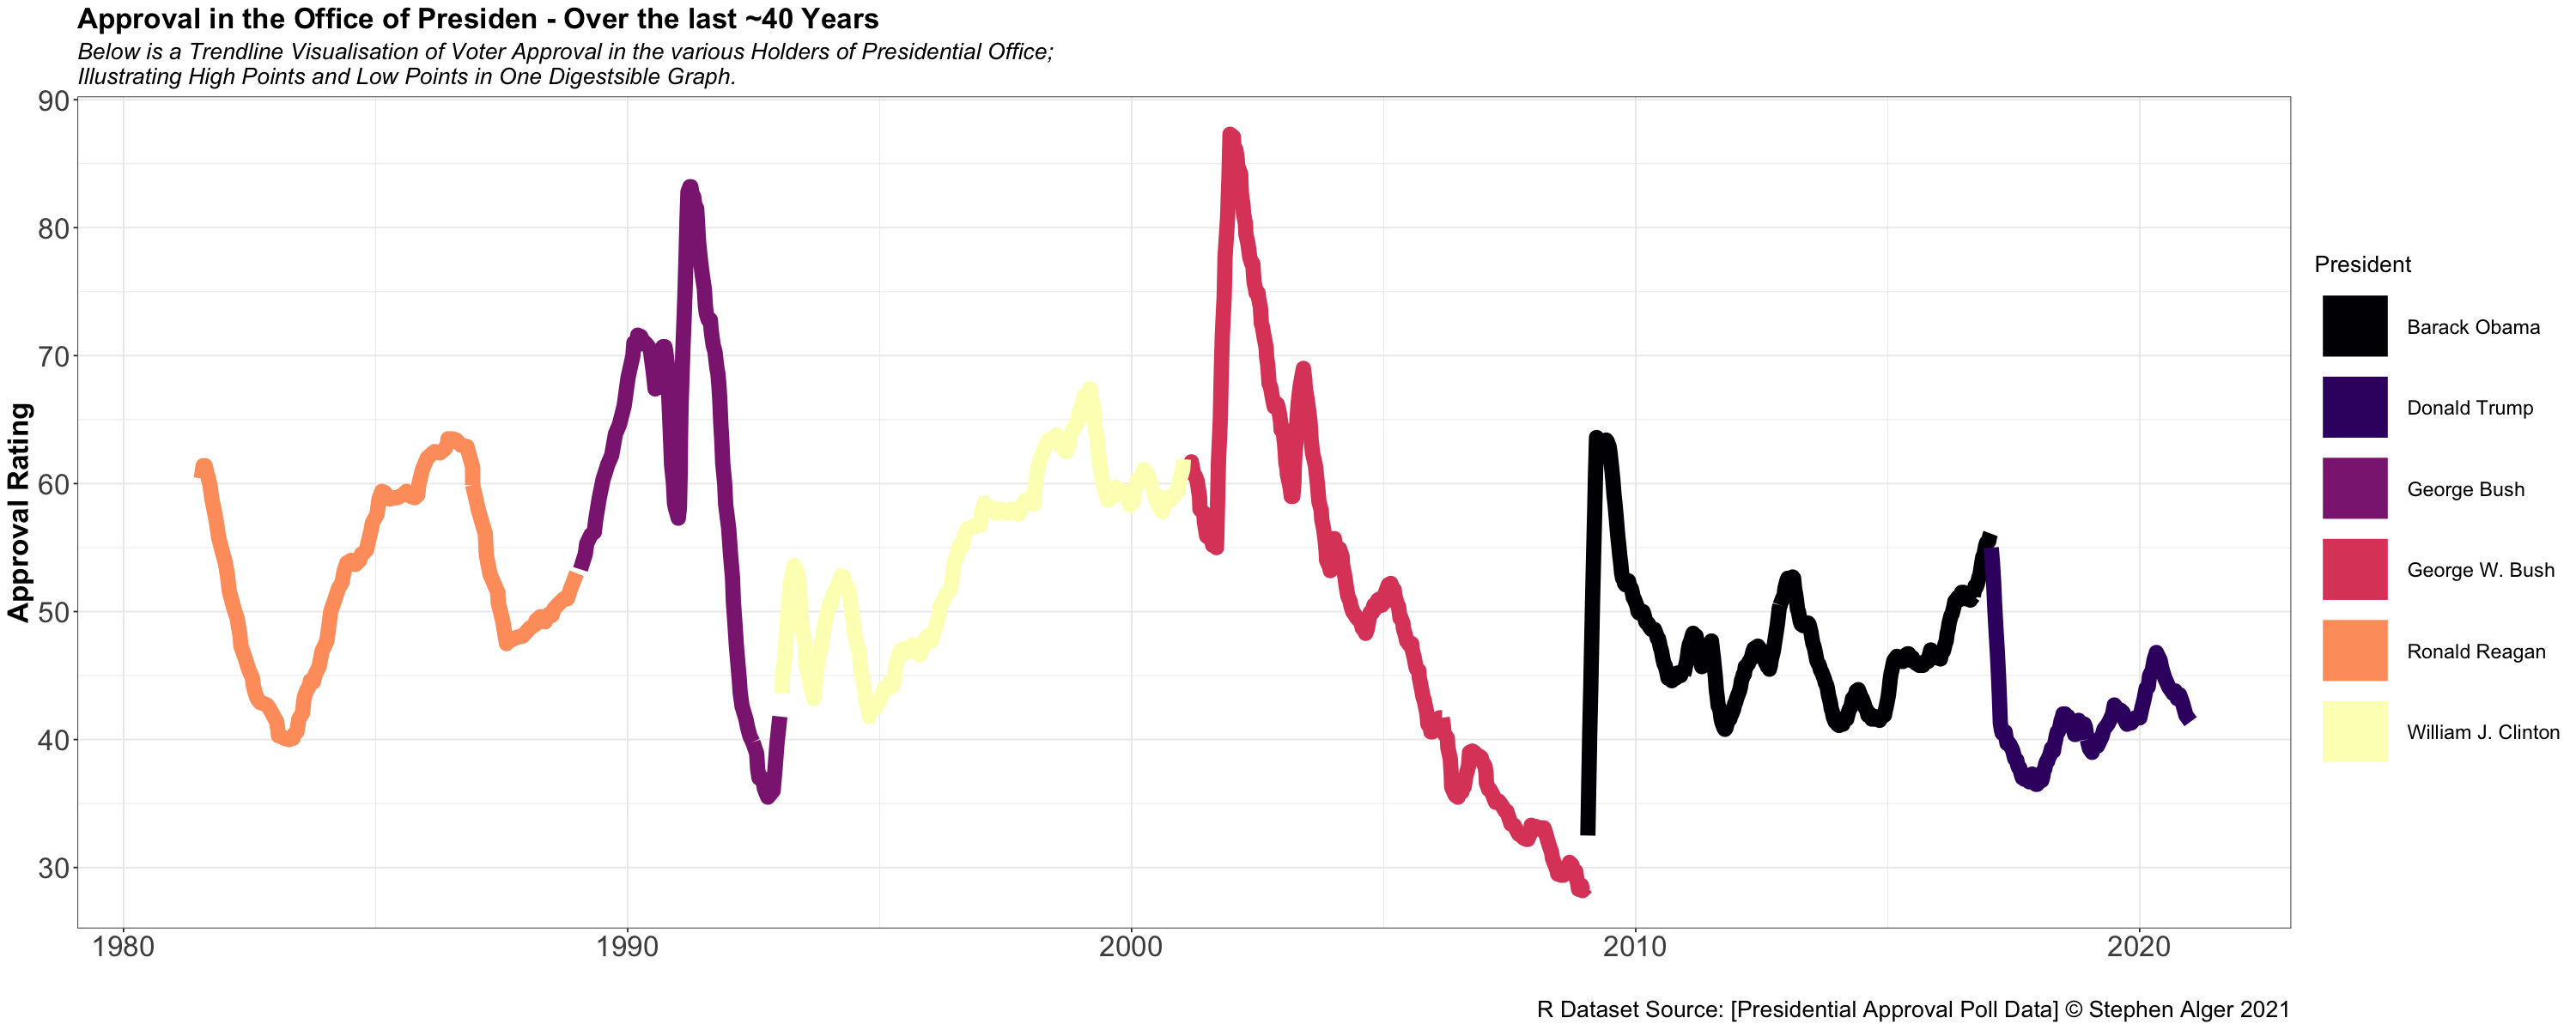

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.

Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
“Option 'Inferno' does not exist. Defaulting to 'viridis'.”
Warning message:
“Removed 9 row(s) containing missing values (geom_path).”


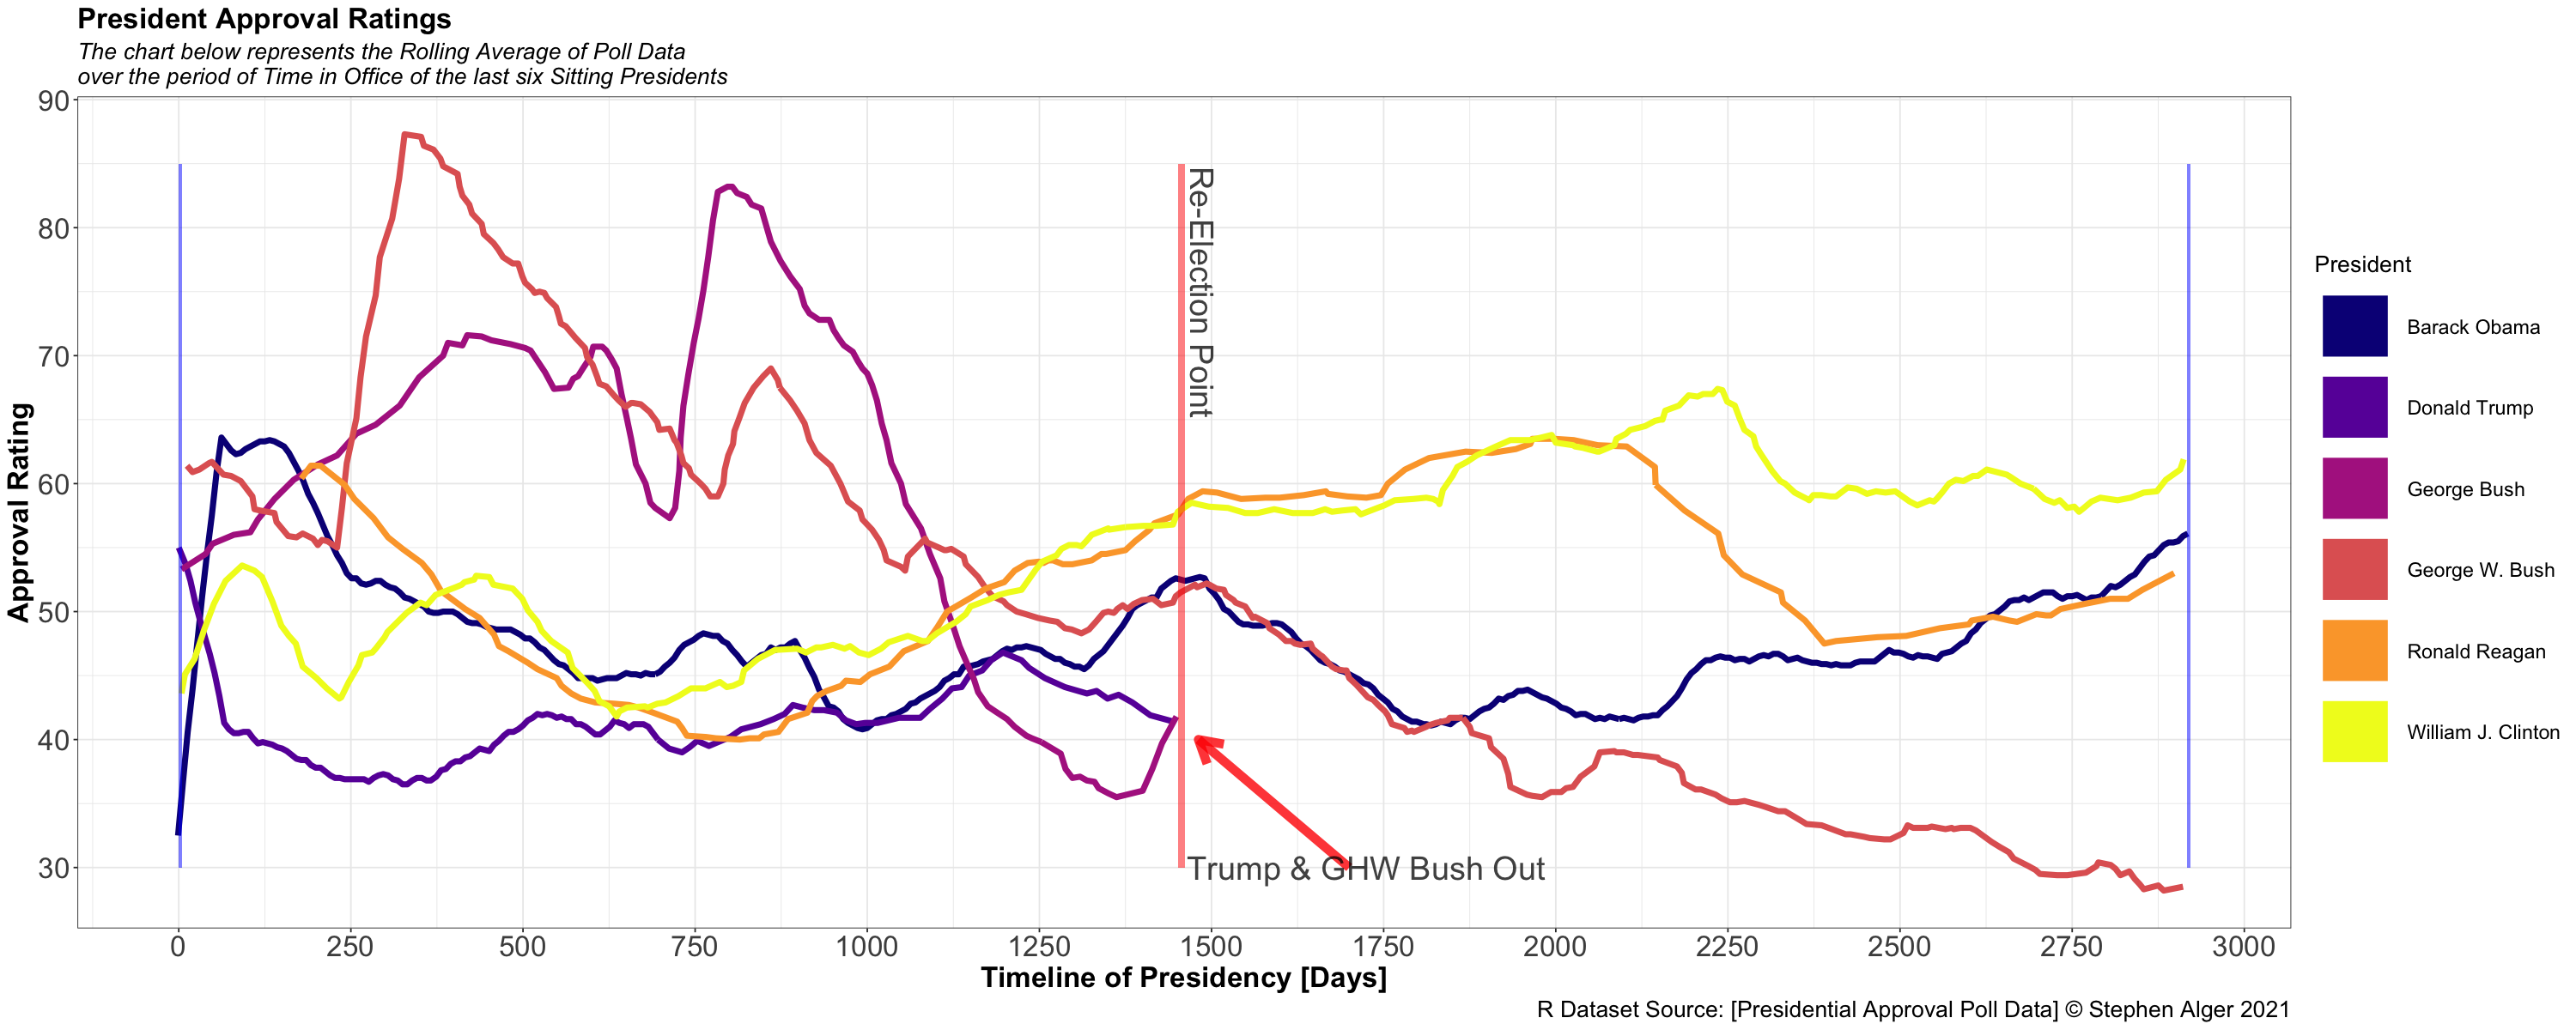

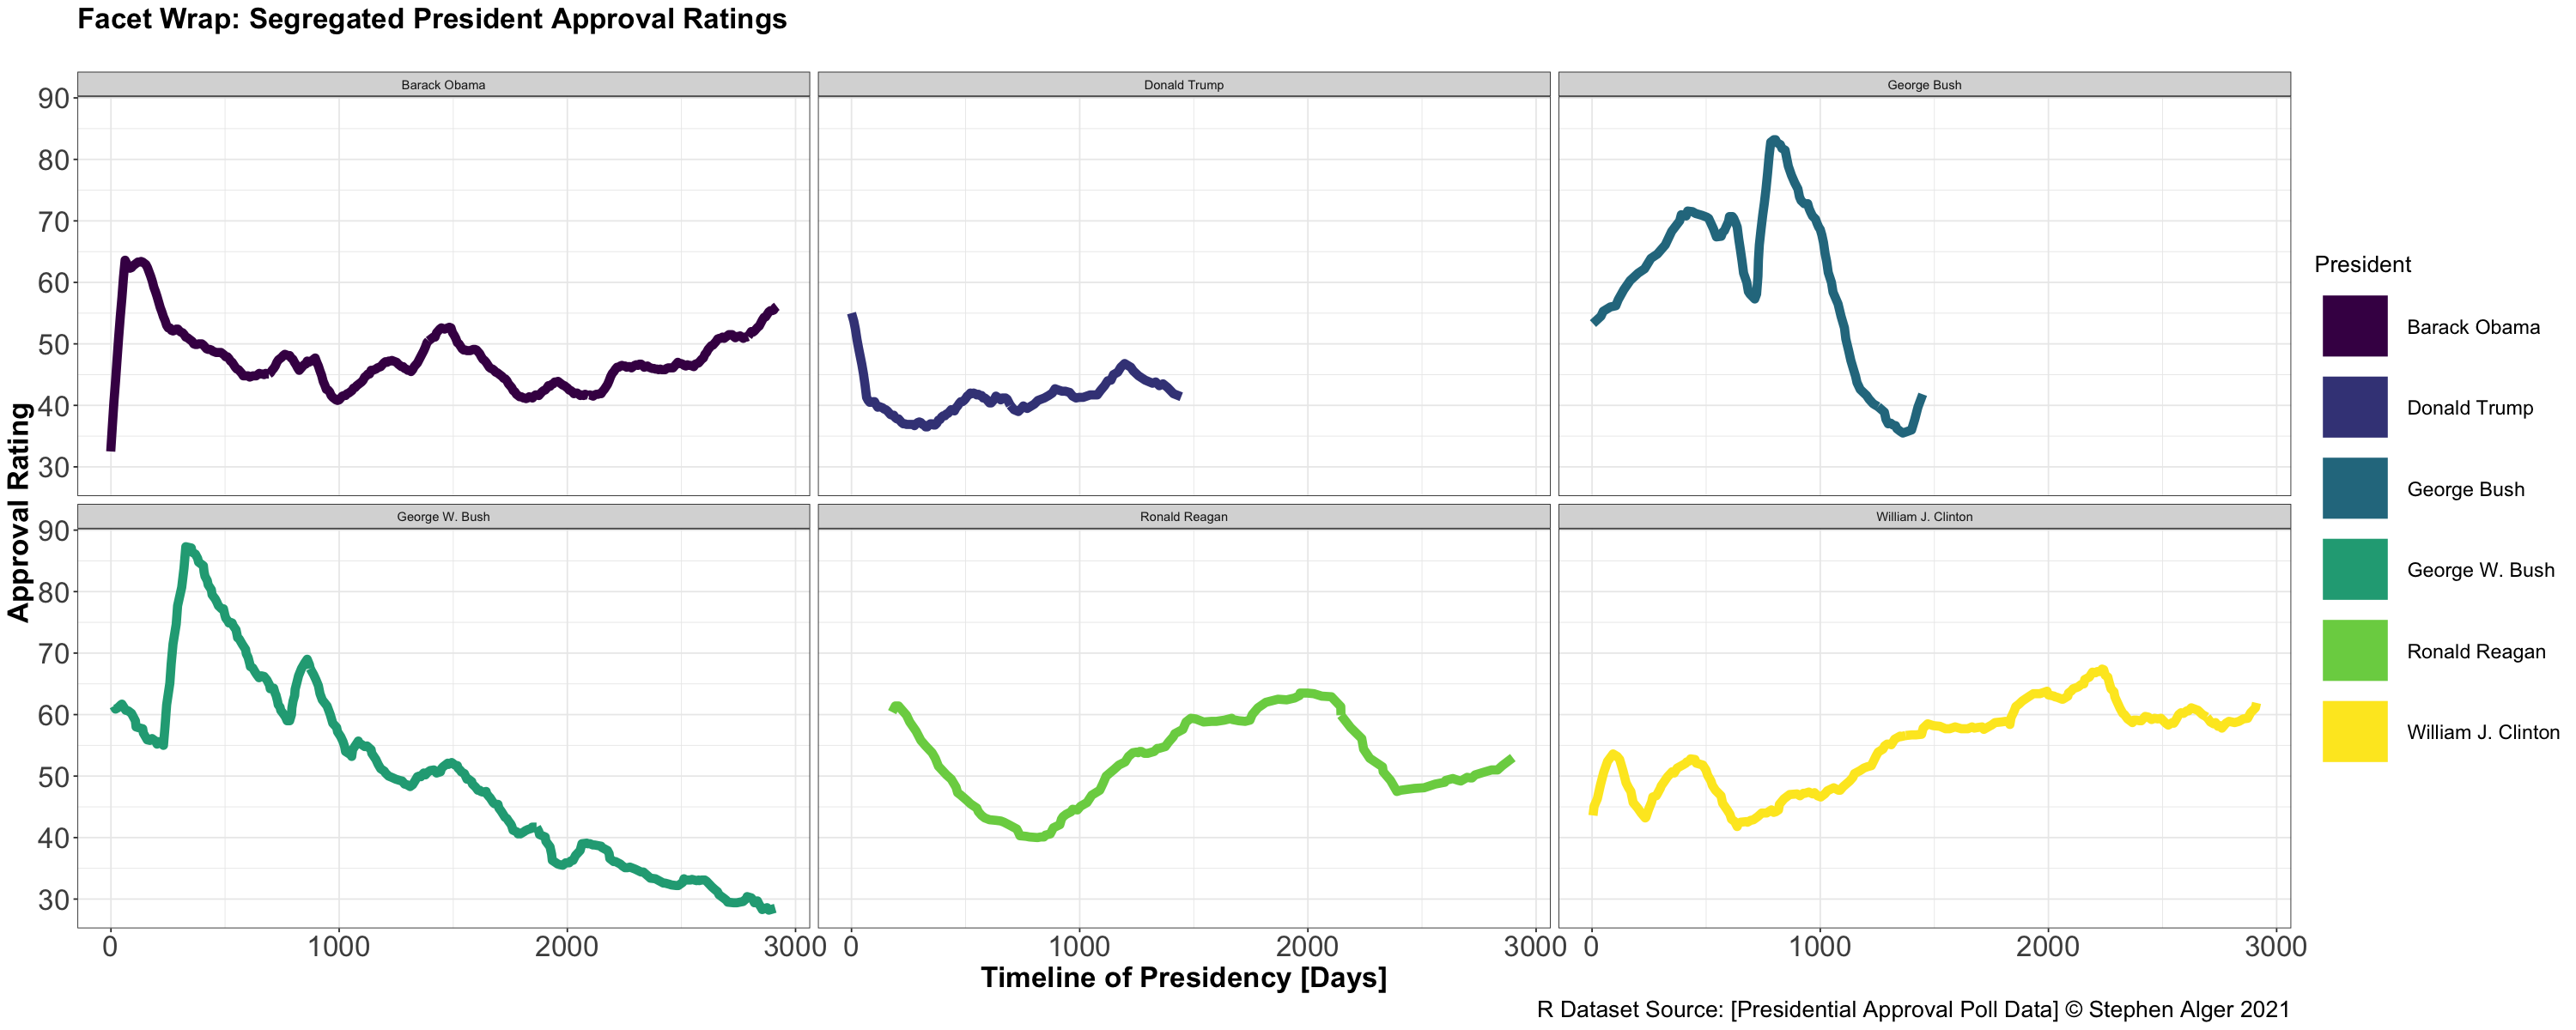

In [402]:
SinglelineChart
MultilineChart
FacetWrapLineChart

## Isolate My Key Line:

In [380]:
# Filter Presidents By Approval Rating.... 
# Trivia: Who is the Only President in the Last 40 years to "achieve" a sub 30 Rolling Average Approval Rating during their term(s) in office? 😂
 
PresidentialApproval_filtered <- PresidentialApproval %>%
  group_by(President) %>% 
  filter(min(AvgApprove) < 30) %>%
  ungroup()

Warning message:
“Removed 9 row(s) containing missing values (geom_path).”


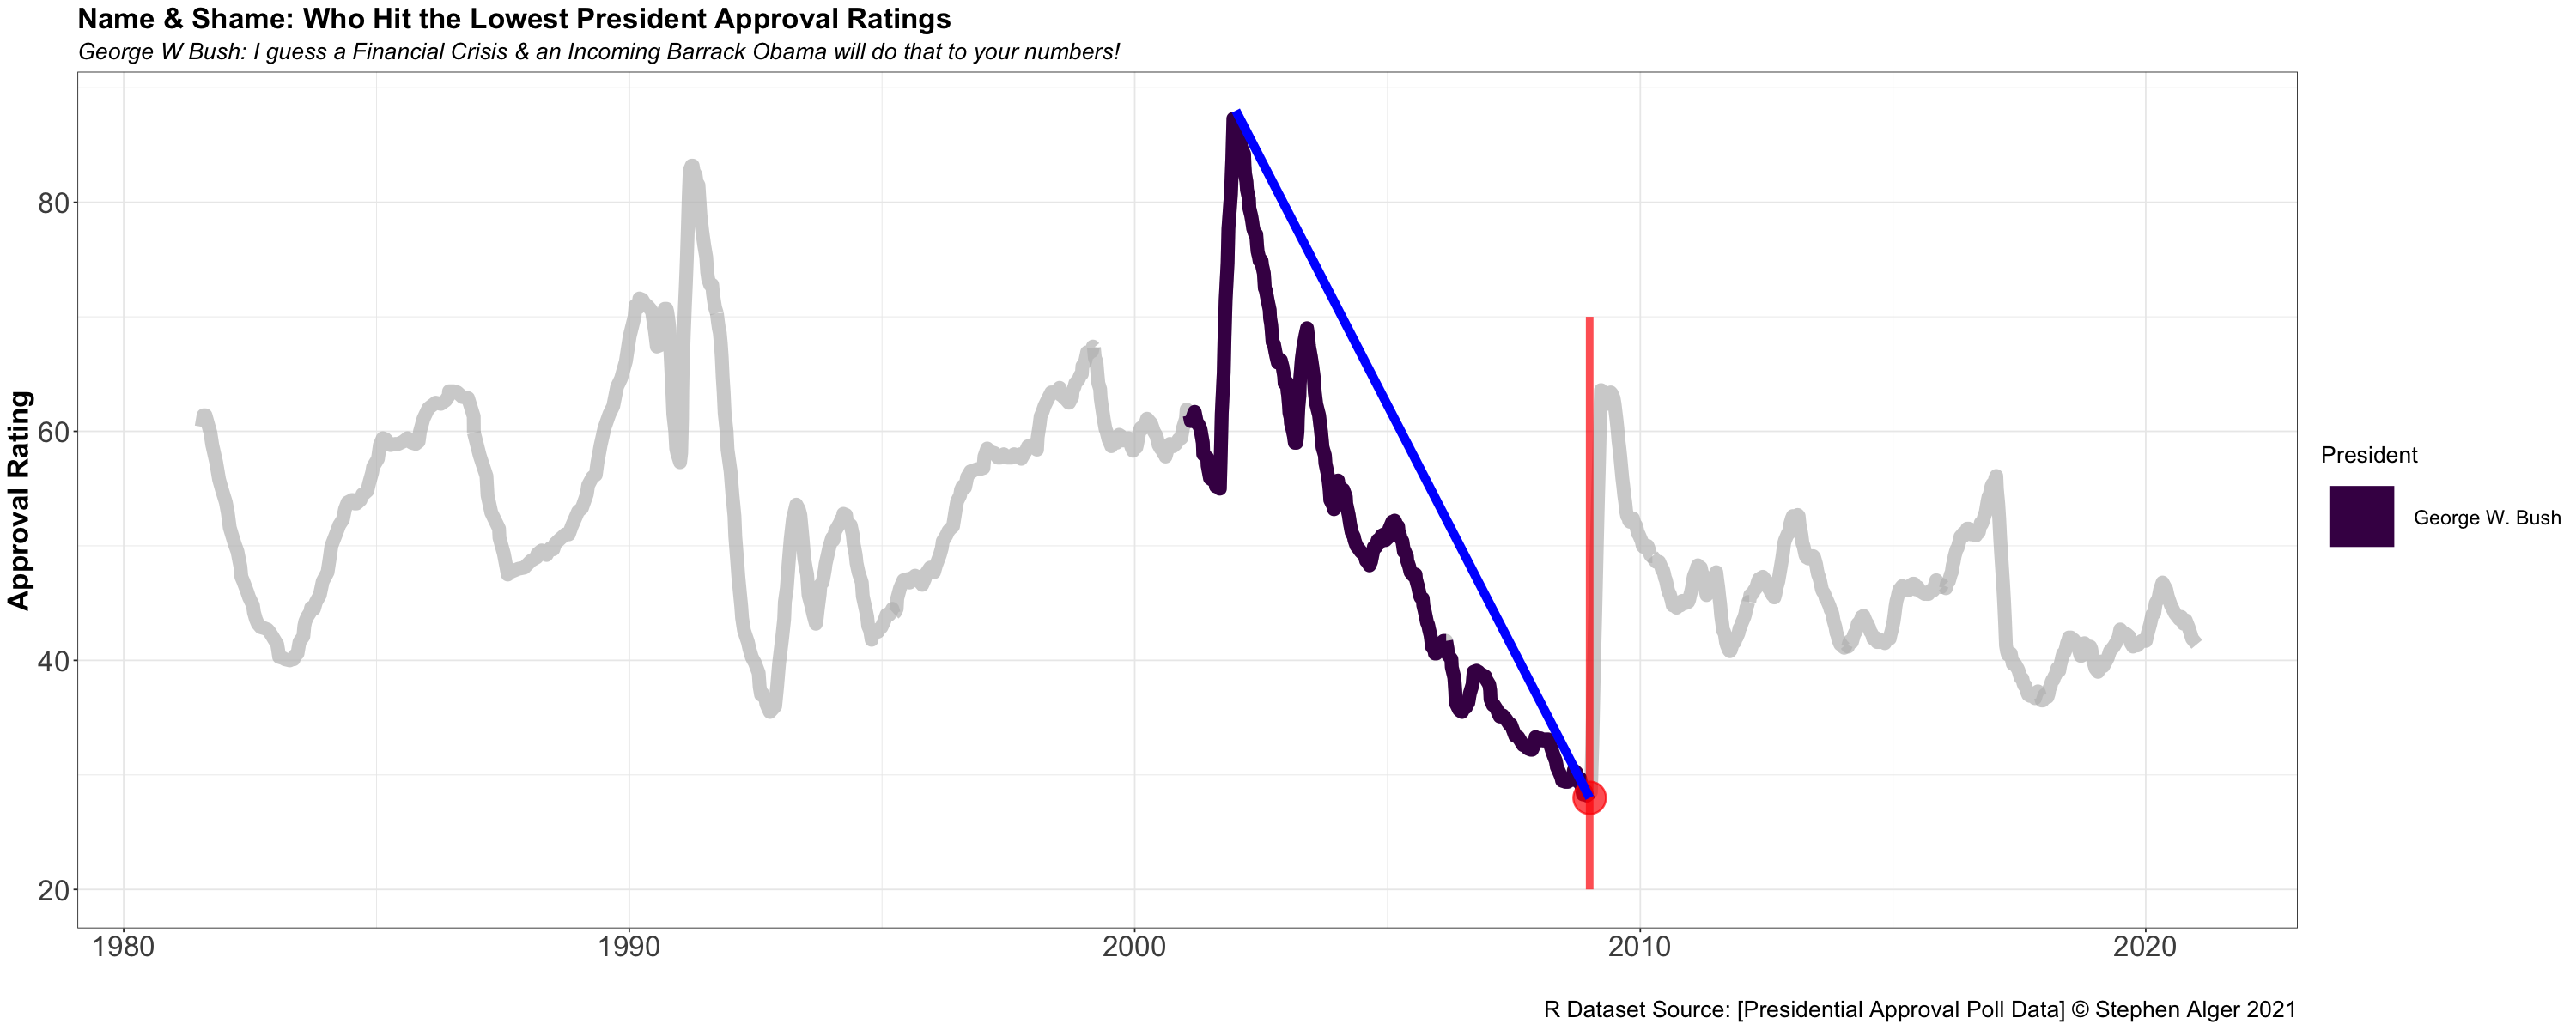

In [387]:
ggplot() +
    # Draw Unfiltered Data in Grey
    geom_line(aes(x=Date,y=AvgApprove, colour=President, size=5), data = PresidentialApproval, colour = alpha("grey", 0.7)) +
    # Highlight Our Key Line: George W Bush  
    geom_line(aes(x=Date,y=AvgApprove, colour=President, size=5), data = PresidentialApproval_filtered)+
    annotate("pointrange", x = as.Date("2008-12-31"), y = 28, ymin = 20, ymax = 70, colour = alpha("red",0.7), size = 2.5) +
    annotate("segment", x = as.Date("2001-12-31"), xend = as.Date("2008-12-31"), y = 88, yend = 28, size=3,colour = "blue")+
    guides(color = guide_legend(override.aes = list(size = 20)))+
    scale_color_viridis(discrete = TRUE)+
    guides(size = FALSE)+
    theme_bw()+my_Theme+
    labs(x = " ", y="Approval Rating",
        title="Name & Shame: Who Hit the Lowest President Approval Ratings",
        subtitle="George W Bush: I guess a Financial Crisis & an Incoming Barrack Obama will do that to your numbers! ",
        caption="R Dataset Source: [Presidential Approval Poll Data] © Stephen Alger 2021")

